In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("test3.jpeg",cv2.IMREAD_COLOR)
img.shape

(426, 640, 3)

In [3]:
img = np.array(img)
img[:,:,0],img[:,:,2] = np.array(img[:,:,2]), np.array(img[:,:,0])

In [4]:
img = 0.3 * img[:,:,0] + 0.59 * img[:,:,1] + 0.11 * img[:,:,2]
img.shape

(426, 640)

In [5]:
img

array([[137., 139., 140., ..., 222., 222., 221.],
       [136., 137., 139., ..., 222., 222., 222.],
       [134., 135., 137., ..., 222., 222., 222.],
       ...,
       [ 23.,  23.,  23., ..., 123., 122., 121.],
       [ 22.,  22.,  22., ..., 122., 123., 121.],
       [ 22.,  22.,  22., ..., 122., 123., 120.]])

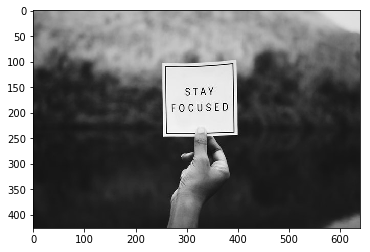

In [6]:
plt.imshow(img, cmap="gray")

In [7]:
img = img.astype(int)
temp = img

In [8]:
dim = img.shape
img

array([[137, 138, 140, ..., 222, 222, 221],
       [136, 137, 138, ..., 222, 222, 222],
       [134, 135, 137, ..., 222, 222, 222],
       ...,
       [ 23,  23,  23, ..., 123, 121, 121],
       [ 22,  22,  22, ..., 121, 123, 121],
       [ 22,  22,  22, ..., 121, 123, 120]])

In [9]:
def histogram(img):
    dim = img.shape
    freq = [0.0] * 256
    for i in range(dim[0]):
        for j in range(dim[1]):
            freq[ img[i][j] ] += 1
    freq = np.array(freq)/(dim[0]*dim[1])
    
    cummsum = [0.0] * 256
    for i in range(256):
        cummsum[i] = np.sum(freq[:i+1])
    
    return cummsum

In [10]:
cumu = histogram(img)
# cumu

In [11]:
cdf = [ cumu[i]*256 for i in range(256) ]
cdf = np.array(cdf).astype(int)
y = np.zeros(dim)
for i in range(dim[0]):
    for j in range(dim[1]):
        y[i][j] = cdf[img[i][j]]

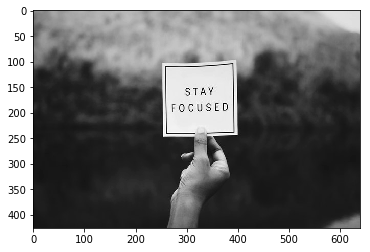

In [12]:
plt.imshow(img, cmap="gray", label="Original")

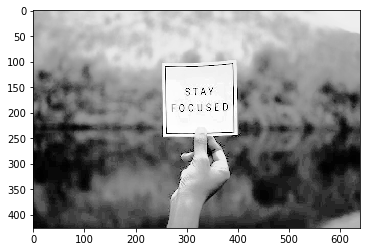

In [13]:
plt.imshow(y, cmap = "gray", label="Transformed")

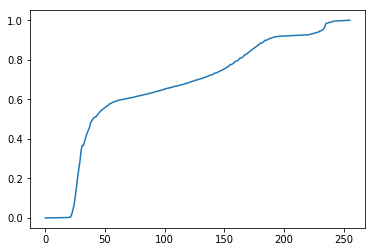

In [14]:
plt.plot(cumu)